In [1]:
import spacy

nlp=spacy.load('en_core_web_sm')

In [2]:
doc=nlp(u'Tesla is looking at buying U.S. startup for $6 million')

In [5]:
for token in doc:
    print(token.text,token.pos_,token.dep_)

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN dobj
startup VERB advcl
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


In [6]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x223e7d65c10>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x223e7d65e50>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x223e7d82ff0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x223e7ff32d0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x223e801ab10>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x223e7d831b0>)]

In [7]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

# tokenization

In [8]:
doc2=nlp(u"Tesla is not looking into startups anymore")

In [10]:
for token in doc2:
    print(token,token.text,token.pos_,token.dep_)

Tesla Tesla PROPN nsubj
is is AUX aux
not not PART neg
looking looking VERB ROOT
into into ADP prep
startups startups NOUN pobj
anymore anymore ADV advmod


In [13]:
# span : span is a slice of doc object in the form of doc[start:stop]

doc4=nlp(u"This is the first sentence. This is the second sentence. This is an another sentence.")

In [14]:
for token in doc4:
    print(token)

This
is
the
first
sentence
.
This
is
the
second
sentence
.
This
is
an
another
sentence
.


In [15]:
for di in doc4.sents:
    print(di)

This is the first sentence.
This is the second sentence.
This is an another sentence.


In [18]:
doc4[6].is_sent_start

True

# tokenization - tokenization is the process of breaking up the original text into component pieces (tokens).

In [19]:
import spacy

nlp=spacy.load('en_core_web_sm')

In [20]:
mystring='"We\'re moving to L.A.!"'

In [21]:
mystring

'"We\'re moving to L.A.!"'

In [22]:
doc=nlp(mystring)

In [23]:
doc

"We're moving to L.A.!"

In [25]:
for token in doc:
    print(token.text)

"
We
're
moving
to
L.A.
!
"


In [28]:
doc5=nlp(u"A 5km NYC cab ride costs $10.30.")

In [30]:
for tok in doc5:
    print(tok)

A
5
km
NYC
cab
ride
costs
$
10.30
.


In [32]:
len(doc5)

10

In [36]:
len(doc5.vocab)

776

In [42]:
doc5=nlp(u"It is better to give then receive.")

In [43]:
for u in doc5:
    print(u)

It
is
better
to
give
then
receive
.


In [39]:
doc5[0]

It

In [40]:
doc5[2:5]

better to give

In [45]:
doc8=nlp(u"Apple to build a Hong Kong factory for $6 million")

In [49]:
for tok in doc8:
    print(tok.text,end=' $ ')

Apple $ to $ build $ a $ Hong $ Kong $ factory $ for $ $ $ 6 $ million $ 

In [47]:
print('potty',end=' m')

potty m

In [52]:
for entity in doc8.ents:
    print(entity)
    print(entity.label_)
    print(spacy.explain(entity.label_))
    print('\n')

Apple
ORG
Companies, agencies, institutions, etc.


Hong Kong
GPE
Countries, cities, states


$6 million
MONEY
Monetary values, including unit




In [54]:
doc9=nlp(u"Autonomous cars shift insurance liability toward manufactures.")

In [55]:
for chunk in doc9.noun_chunks:
    print(chunk)

Autonomous cars
insurance liability
manufactures


# tokenization visualization

In [56]:
from spacy import displacy

In [57]:
doc=nlp(u"Apple is going to buld a U.K factory for $5 million.")

In [61]:
displacy.render(doc,style='dep',jupyter=True,options={'distance':100})

In [62]:
doc=nlp(u"Over the last quarter Apple sold nearly sold nearly 20 thousand ipods for a profit of $6 million.")

In [64]:
displacy.render(doc,style='ent',options={'distance':100},jupyter=True)

In [65]:
displacy.serve(doc,style='ent')

D:\nlp_spacy\learn_nlp\Lib\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...



127.0.0.1 - - [12/Oct/2024 07:34:14] "GET / HTTP/1.1" 200 1721
127.0.0.1 - - [12/Oct/2024 07:34:14] "GET /favicon.ico HTTP/1.1" 200 1721


Shutting down server on port 5000.


# stemming  (NLTK)

In [67]:
import nltk


In [68]:
from nltk.stem.porter import PorterStemmer

In [69]:
p_stemmer=PorterStemmer()


<PorterStemmer>

In [72]:
words=['run','runner','ran','runs','easily','fairly']

In [75]:
for word in words:
    print(f'{word}------->{p_stemmer.stem(word)}')

run------->run
runner------->runner
ran------->ran
runs------->run
easily------->easili
fairly------->fairli


In [78]:
from nltk.stem.snowball import SnowballStemmer

s_stemmer=SnowballStemmer(language='english')

In [80]:
for word in words:
    print(f'{word}------> {s_stemmer.stem(word)}')

run------> run
runner------> runner
ran------> ran
runs------> run
easily------> easili
fairly------> fair


In [81]:
words=['generous','generation','generously','generate']

In [84]:
for word in words:
    print(f'{word}------>{s_stemmer.stem(word)}')

generous------>generous
generation------>generat
generously------>generous
generate------>generat


# lemmatization

In [85]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [87]:
doc1=nlp(u"I am a runner running in a race because I love to run since I ran today")

In [93]:
for token in doc1:
    print(token.text,'\t',token.pos_,'\t',token.lemma,'\t',token.lemma_)

I 	 PRON 	 4690420944186131903 	 I
am 	 AUX 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 4690420944186131903 	 I
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
I 	 PRON 	 4690420944186131903 	 I
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


# stop words

In [94]:
import spacy

nlp=spacy.load('en_core_web_sm')

In [95]:
print(nlp.Defaults.stop_words)

{'anywhere', 'ca', 'becomes', 'me', 'before', 'regarding', 'just', 'somehow', 'into', 'at', 'hence', 'some', 'already', 'becoming', 'either', 'next', 'am', 'us', 'several', 'something', 'really', 'never', 'however', 'you', 'your', 'other', 'above', 'both', 'rather', 'too', 'every', 'sometime', 'she', 'anyone', 'put', 'through', 'via', 'beyond', 'each', '’s', 'call', 're', 'almost', 'now', 'top', 'could', 'someone', 'well', 'thus', 'her', 'perhaps', 'first', 'n‘t', 'did', '’ll', 'whose', 'seeming', 'without', 'else', 'always', 'which', 'that', 'be', 'everyone', 'eight', 'along', 'few', 'neither', 'indeed', 'whoever', 'who', 'most', 'beside', 'part', 'nor', 'might', 'there', 'if', 'side', 'being', 'two', '‘ll', 'until', 'because', 'behind', 'make', 'least', 'ten', 'various', 'where', 'whereafter', 'further', 'twenty', 'six', 'hereafter', 'anyhow', 'does', "'re", 'been', 'even', 'latterly', 'alone', 'otherwise', 'he', 'upon', 'yourself', 'another', 'while', '’ve', 'everywhere', 'due', 'on

In [96]:
len(nlp.Defaults.stop_words)

326

In [98]:
nlp.vocab['is'].is_stop

True

In [99]:
nlp.vocab['rejuvenate'].is_stop

False

In [100]:
#add a stop word to vocab

nlp.Defaults.stop_words.add('btw')

In [101]:
nlp.vocab['btw'].is_stop

True

In [103]:
nlp.vocab['beyond'].is_stop

True

In [105]:
nlp.Defaults.stop_words.remove('beyond')

In [106]:
nlp.vocab['beyond'].is_stop

True

# phrase matching and vocabulary

In [113]:
from spacy.matcher import Matcher

In [114]:
nlp=spacy.load('en_core_web_sm')

In [115]:
matcher=Matcher(nlp.vocab)

In [119]:
#solarpower
#Solar-power
#solar power
pattern1=[{'LOWER':'solarpower'}]
pattern2=[{'LOWER':'solar'},{'IS_PUNCT':True},{'LOWER':'power'}]
pattern3=[{'LOWER':'solar'},{'LOWER':'power'}]


matcher.add('SolarPower',patterns=[pattern1,pattern2,pattern3])

In [132]:
doc=nlp(u"The solar Power industry solar--power continues to grow as solarpower increases. Solar-power is amazing")

In [121]:
found_matches=matcher(doc)

In [122]:
found_matches

[(8656102463236116519, 1, 3),
 (8656102463236116519, 8, 9),
 (8656102463236116519, 11, 14)]

In [136]:
for match_id,start,end in g:
    string_id=nlp.vocab.strings[match_id]
    span=doc[start:end]
    print(match_id,string_id,start,end,span.text)

8656102463236116519 SolarPower 1 3 solar Power
8656102463236116519 SolarPower 4 7 solar--power
8656102463236116519 SolarPower 11 12 solarpower
8656102463236116519 SolarPower 14 17 Solar-power


In [125]:
matcher.remove('SolarPower')

In [133]:
#create a matcher under solar power

pattern1=[{'LOWER':'solarpower'}]
pattern2=[{'LOWER':'solar'},{'IS_PUNCT':True,'OP':'*'},{'LOWER':'power'}]


matcher.add('SolarPower',patterns=[pattern1,pattern2])

In [135]:
g=matcher(doc)

In [142]:
pa="C:\\Users\\udayk\\Downloads\\UPDATED_NLP_COURSE\\UPDATED_NLP_COURSE\\TextFiles\\reaganomics.txt"

In [153]:
import spacy

nlp=spacy.load('en_core_web_sm')

In [154]:
from spacy.matcher import PhraseMatcher

matcher=PhraseMatcher(nlp.vocab)

In [156]:
with open(pa)as new:
    data=new.read()
    data=nlp(data)

In [147]:
print(data)

b'REAGANOMICS\r\nhttps://en.wikipedia.org/wiki/Reaganomics\r\n\r\nReaganomics (a portmanteau of [Ronald] Reagan and economics attributed to Paul Harvey)[1] refers to the economic policies promoted by U.S. President Ronald Reagan during the 1980s. These policies are commonly associated with supply-side economics, referred to as trickle-down economics or voodoo economics by political opponents, and free-market economics by political advocates.\r\n\r\nThe four pillars of Reagan\'s economic policy were to reduce the growth of government spending, reduce the federal income tax and capital gains tax, reduce government regulation, and tighten the money supply in order to reduce inflation.[2]\r\n\r\nThe results of Reaganomics are still debated. Supporters point to the end of stagflation, stronger GDP growth, and an entrepreneur revolution in the decades that followed.[3][4] Critics point to the widening income gap, an atmosphere of greed, and the national debt tripling in eight years which ult

In [157]:
terms=['voodoo economics','supply-side economics','trickle-down economics','free-market economics']

In [158]:
phrase_patterns=[nlp(text) for text in terms]

In [150]:
phrase_patterns

[voodoo economics,
 supply-side economics,
 trickle-down economics,
 free-market economics]

In [159]:
type(phrase_patterns[0])

spacy.tokens.doc.Doc

In [160]:
matcher.add('EconMatcher',None,*phrase_patterns)

In [161]:
found_matches=matcher(data)

In [162]:
found_matches

[(3680293220734633682, 41, 45),
 (3680293220734633682, 49, 53),
 (3680293220734633682, 54, 56),
 (3680293220734633682, 61, 65),
 (3680293220734633682, 673, 677),
 (3680293220734633682, 2987, 2991)]

In [168]:
for match_id,start,end in found_matches:
    print(nlp.vocab.strings[match_id])
    span=data[start:end]
    print(f'{span}\n')

EconMatcher
supply-side economics

EconMatcher
trickle-down economics

EconMatcher
voodoo economics

EconMatcher
free-market economics

EconMatcher
supply-side economics

EconMatcher
trickle-down economics



# part-2

In [169]:
import spacy

In [176]:
nlp=spacy.load('en_core_web_sm')

In [177]:
doc=nlp(u"The quick brown fox jumped over the lazy dog's back.")

In [179]:
doc[0].tag_

'DT'

In [180]:
doc[4]

jumped

In [185]:
doc[4].pos_ #part of speech tag

'VERB'

In [187]:
doc[4].tag_ #fine grained tag

'VBD'

In [195]:
for token in doc:
    print(f"{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.tag_)}\n")

The        DET        DT         determiner

quick      ADJ        JJ         adjective (English), other noun-modifier (Chinese)

brown      ADJ        JJ         adjective (English), other noun-modifier (Chinese)

fox        NOUN       NN         noun, singular or mass

jumped     VERB       VBD        verb, past tense

over       ADP        IN         conjunction, subordinating or preposition

the        DET        DT         determiner

lazy       ADJ        JJ         adjective (English), other noun-modifier (Chinese)

dog        NOUN       NN         noun, singular or mass

's         PART       POS        possessive ending

back       NOUN       NN         noun, singular or mass

.          PUNCT      .          punctuation mark, sentence closer



In [198]:
new_word=nlp(u"I read books on NLP")

new_word[1].text

'read'

In [200]:
POS_counts=doc.count_by(spacy.attrs.POS)

In [201]:
POS_counts

{90: 2, 84: 3, 92: 3, 100: 1, 85: 1, 94: 1, 97: 1}

In [204]:
sorted(POS_counts.items())

[(84, 3), (85, 1), (90, 2), (92, 3), (94, 1), (97, 1), (100, 1)]

In [208]:
for k,v in sorted(POS_counts.items()):
    print(f"{k}. {doc.vocab[k].text:{5}} {v}")

84. ADJ   3
85. ADP   1
90. DET   2
92. NOUN  3
94. PART  1
97. PUNCT 1
100. VERB  1


In [209]:
doc

The quick brown fox jumped over the lazy dog's back.

In [210]:
POS_COUNTS=doc.count_by(spacy.attrs.POS)

In [211]:
POS_COUNTS

{90: 2, 84: 3, 92: 3, 100: 1, 85: 1, 94: 1, 97: 1}

In [212]:
doc.vocab[83].text

'LANG'

In [213]:
doc.vocab[84].text

'ADJ'

In [216]:
doc[2].pos_

'ADJ'

In [225]:
for k,v in sorted(POS_COUNTS.items()):
    print(f"{k} | {doc.vocab[k].text:{5}} ")

84 | ADJ   
85 | ADP   
90 | DET   
92 | NOUN  
94 | PART  
97 | PUNCT 
100 | VERB  


In [226]:
len(doc.vocab)

785

In [227]:
from spacy import displacy

displacy.render(doc,style='dep',jupyter=True)

In [228]:
doc2=nlp(u"This is a sentence. This is another sentence, possibly longer than the other.")

In [229]:
spans=list(doc2)

In [232]:
doc2

This is a sentence. This is another sentence, possibly longer than the other.

In [230]:
spans

[This,
 is,
 a,
 sentence,
 .,
 This,
 is,
 another,
 sentence,
 ,,
 possibly,
 longer,
 than,
 the,
 other,
 .]

In [236]:
spans=[sen for sen in doc2.sents]
    

In [237]:
displacy.serve(spans,style='dep')


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



127.0.0.1 - - [12/Oct/2024 14:56:47] "GET / HTTP/1.1" 200 10643
127.0.0.1 - - [12/Oct/2024 14:56:47] "GET /favicon.ico HTTP/1.1" 200 10643


Shutting down server on port 5000.


In [242]:
def show_ents(doc):
    if doc.ents:
        for e in doc.ents:
            print(e.text+'- '+e.label_+' -'+str(spacy.explain(e.label_)))
    else:
        print('no entities found')

In [243]:
doc6=nlp(u"I am fine.")

In [244]:
show_ents(doc6)

no entities found


In [250]:
doc7=nlp("Nairobi is capital city of Kenya.")

In [251]:
doc7

Nairobi is capital city of Kenya.

In [252]:
show_ents(doc7)

Nairobi- GPE -Countries, cities, states
Kenya- GPE -Countries, cities, states


In [262]:
doc=nlp(u"our company created a brand new vaccum cleaner"
        u"This new vaccum-cleaner is the best in the show")

In [263]:
show_ents(doc)

no entities found


In [267]:
from spacy.matcher import PhraseMatcher

matcher=PhraseMatcher(nlp.vocab)

phrase_list=["vaccum cleaner","vaccum-cleaner"]

phras=[nlp(text) for text in phrase_list]

matcher.add("new_product",None,*phras)

found_metrics=matcher(doc)



In [268]:
found_metrics

[(9676102616875934564, 9, 12)]

In [266]:
phrase_pattern

[vaccum cleaner, vaccum-cleaner]

In [270]:
from spacy.tokens import Span

PROD=doc.vocab.strings[u"PRODUCT"]

found_metrics

[(9676102616875934564, 9, 12)]

# named entity recognition

In [2]:
import spacy

nlp=spacy.load("en_core_web_sm")

In [43]:

doc=nlp(u"Our company created a brand new vacuum cleaner."
        u"This new vacuum-cleaner is the best in show.")

In [5]:
show_ents(

Our
company
created
a
brand
new
vacuum
cleaner
.
This
new
vaccum
-
cleaner
is
the
best
in
show
.


In [44]:
def show_ents(d):
    if d.ents:
        for e in d.ents:
            print(e.text+'- '+e.label_+' -'+str(spacy.explain(e.label_)))
    else:
        print('no entities')

In [45]:
show_ents(doc)

no entities


In [9]:
doc_n=nlp(u"Dubai is located in middle eat")

In [46]:
for i in doc_n:
    print(i,i.pos_,i.tag_)

Dubai PROPN NNP
is AUX VBZ
located VERB VBN
in ADP IN
middle ADJ JJ
eat NOUN NN


In [21]:
for i in doc_n.ents:
    print(i,i.label_)

Dubai GPE


In [23]:
from spacy.matcher import PhraseMatcher

In [47]:
matcher=PhraseMatcher(nlp.vocab)

#create desired list of patterns

phrase_list=['vacuum cleaner','vacuum-cleaner']

#p_n=['vaccum']
phrase_patterns=[nlp(text) for text in phrase_list]
#o_v=[nlp(text) for text in p_n]
#add phrase patterns to matcher

matcher.add('new_p',None,*phrase_patterns)
#matcher.add('pop_n',None,*o_v)

In [49]:
found_matches=matcher(doc)
found_matches

[(16848918179171372345, 6, 8), (16848918179171372345, 11, 14)]

In [51]:
from spacy.tokens import Span

PROD=doc.vocab.strings[u"PRODUCT"]

new_ents=[Span(doc,i[1],i[2],label=PROD) for i in found_matches]

doc.ents=list(doc.ents)+new_ents

show_ents(doc)

vacuum cleaner- PRODUCT -Objects, vehicles, foods, etc. (not services)
vacuum-cleaner- PRODUCT -Objects, vehicles, foods, etc. (not services)


In [39]:
matcher(doc)

[(5112210155728363496, 11, 12), (16848918179171372345, 11, 14)]

In [70]:
doc_a=nlp(u"Originally I paid $29.95 for this car toy, but now it is marked down by 10 dollars."
         u"By contrast, Sony only sold 8 thousand walkman music players")

In [71]:
len([ent for ent in doc_a.ents if ent.label_=="MONEY"])

2

# visualizing NER

In [76]:
import spacy

nlp=spacy.load("en_core_web_sm")

from spacy import displacy

displacy.render(doc_a,style='ent',jupyter=True)

In [75]:
for sent in doc_a.sents:
    #print(sent)
    
    displacy.render(sent,style="ent")

In [84]:
#what if we want to visualize only options
colors={'MONEY':'RED'}
options={'ents':['MONEY','ORG'],'colors':colors}

In [85]:
displacy.render(doc_a,style='ent',jupyter=True,options=options)

In [86]:
displacy.serve(doc_a,style='ent',options=options)

D:\nlp_spacy\learn_nlp\Lib\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...



127.0.0.1 - - [13/Oct/2024 13:11:33] "GET / HTTP/1.1" 200 1461
127.0.0.1 - - [13/Oct/2024 13:11:33] "GET /favicon.ico HTTP/1.1" 200 1461


Shutting down server on port 5000.


# sentence segmentation

In [87]:
import spacy

nlp=spacy.load("en_core_web_sm")

In [88]:
doc=nlp(u"This is the first sentence. This is another sentence. This is the last sentence.")

In [89]:
for sent in doc.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [94]:
for s in doc.sents:
    print(s)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [96]:
type(list(doc.sents)[0])

spacy.tokens.span.Span

In [122]:
doc=nlp(u'"Management is doing the right things; leadership is doing the right things."-Peter Druck')

In [123]:
doc.text

'"Management is doing the right things; leadership is doing the right things."-Peter Druck'

In [124]:
for sent in doc.sents:
    print(f'{sent}\n')

"Management is doing the right things; leadership is doing the right things.

"-Peter

Druck



In [126]:
#ADD a SEGMENTATION RULE
from spacy.language import Language
@Language.component("set_custom_boundaries")
def set_custom_boundaries(doc):

    for token in doc[:-1]:
        if token.text==';':
            doc[token.i+1].is_sent_start=True
    return doc
    

In [127]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [129]:
nlp.add_pipe("set_custom_boundaries",before='parser')

<function __main__.set_custom_boundaries(doc)>

In [130]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'set_custom_boundaries',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [134]:
doc=nlp(u'"Management is doing the right things; leadership is doing the right things."-Peter Druck"')

In [135]:
for se in doc.sents:
    print(se)

"Management is doing the right things;
leadership is doing the right things.
"-Peter
Druck"


In [136]:
nlp=spacy.load("en_core_web_sm")

mystring=u"This is a sentence. This is another.\n\n This is a \n third sentence"

In [137]:
print(mystring)


This is a sentence. This is another.

 This is a 
 third sentence


In [138]:
doc=nlp(mystring)

In [140]:
doc

This is a sentence. This is another.

 This is a 
 third sentence

In [139]:
for t in doc.sents:
    print(t)

This is a sentence.
This is another.

 
This is a 
 third sentence


In [142]:
from spacy.pipeline import Sentencizer

In [143]:
def split_on_newlines(doc):
    start=0
    seen_newline=False

    for word in doc:
        if seen_newline

In [144]:
import os

os.listdir("C:\\Users\\udayk\\Downloads\\UPDATED_NLP_COURSE\\UPDATED_NLP_COURSE\\TextFiles")

['amazonreviews.tsv',
 'elon_tweets.txt',
 'elon_tweets2.txt',
 'huckfinn.txt',
 'moviereviews.tsv',
 'moviereviews2.tsv',
 'owlcreek.txt',
 'peterrabbit.txt',
 'reaganomics.txt',
 'reuters.csv',
 'smsspamcollection.tsv',
 'sms_readme.txt']

In [150]:
import pandas as pd
import numpy as np

data=pd.read_csv("C:\\Users\\udayk\\Downloads\\UPDATED_NLP_COURSE\\UPDATED_NLP_COURSE\\TextFiles\\smsspamcollection.tsv",sep='\t')

In [151]:
data

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [152]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [155]:
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [156]:
len(data)

5572

In [157]:
data['label'].unique()

array(['ham', 'spam'], dtype=object)

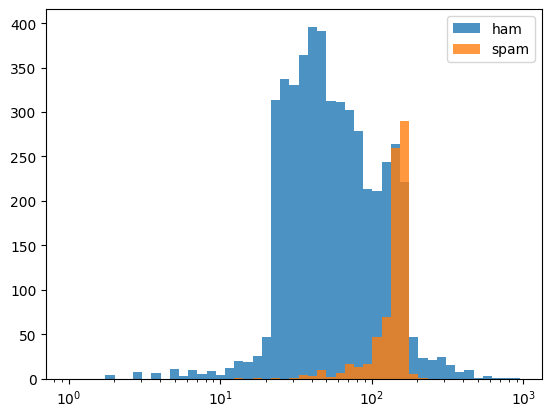

In [167]:
import matplotlib.pyplot as plt
#visualize length distribution for these categories
plt.xscale('log')
bins=1.15**(np.arange(0,50))
plt.hist(data[data['label']=='ham']['length'],bins=bins,alpha=0.8,label='ham');
plt.hist(data[data['label']=='spam']['length'],bins=bins,alpha=0.8,label='spam');
plt.legend();

In [174]:
X=data[['length','punct']]

In [169]:
y=data['label']

In [175]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [176]:
x_train.shape

(4457, 2)

In [177]:
y_train.shape

(4457,)

In [179]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='lbfgs')

model.fit(x_train,y_train)

model.score(x_test,y_test)

0.8286995515695067

In [180]:
preds=model.predict(x_test)

In [188]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test,preds),index=['ham','spam'],columns=['ham','spam'])

,ham,spam
ham,921,32
spam,159,3


In [190]:
from sklearn.metrics import classification_report

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         ham       0.85      0.97      0.91       953
        spam       0.09      0.02      0.03       162

    accuracy                           0.83      1115
   macro avg       0.47      0.49      0.47      1115
weighted avg       0.74      0.83      0.78      1115



In [193]:
import sklearn
sklearn.metrics.accuracy_score(y_test,preds)

0.8286995515695067

In [194]:
from sklearn.naive_bayes import MultinomialNB

mb=MultinomialNB()

In [196]:
mb.fit(x_train,y_train)

MultinomialNB()

In [197]:
mb.score(x_test,y_test)

0.8538116591928251

In [198]:
prs=mb.predict(x_test)

In [200]:
from sklearn.metrics import classification_report

print(classification_report(prs,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.86      0.92      1112
        spam       0.01      0.33      0.01         3

    accuracy                           0.85      1115
   macro avg       0.50      0.59      0.47      1115
weighted avg       1.00      0.85      0.92      1115



# Feature extraction

## count vectorizer


In [208]:
import numpy as np
import pandas as pd

df=pd.read_csv("C:\\Users\\udayk\\Downloads\\UPDATED_NLP_COURSE\\UPDATED_NLP_COURSE\\TextFiles\\smsspamcollection.tsv",sep='\t')

In [209]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [210]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [211]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [318]:
X=df['message']
y=df['label']

In [319]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [320]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3733,), (3733,), (1839,), (1839,))

In [322]:
x_train.head()

3235                                  Yup ü not comin :-(
945     I sent my scores to sophas and i had to do sec...
5319                         Kothi print out marandratha.
5528    Its just the effect of irritation. Just ignore it
247                        I asked you to call him now ok
Name: message, dtype: object

In [243]:
from sklearn.feature_extraction.text import CountVectorizer

In [244]:
count_vect=CountVectorizer()

In [245]:
#fit vectorize to the data (build a vocab,count the number of words)

count_vect.fit(x_train)

CountVectorizer()

In [246]:
x_train_counts=count_vect.transform(x_train)

In [247]:
x_train_counts

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 49992 stored elements and shape (3733, 7082)>

In [248]:
x_train.shape

(3733,)

In [249]:
from sklearn.feature_extraction.text import TfidfTransformer

In [250]:
tfidf_transformer=TfidfTransformer()
x_train_tfidf=tfidf_transformer.fit_transform(x_train_counts)

In [251]:
x_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 49992 stored elements and shape (3733, 7082)>

In [252]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec=TfidfVectorizer()

tf_id_vec=vec.fit_transform(x_train)

In [253]:
from sklearn.svm import LinearSVC

In [254]:
clf=LinearSVC()

In [255]:
clf.fit(tf_id_vec,y_train)

LinearSVC()

In [256]:
from sklearn.pipeline import Pipeline

text_clf=Pipeline([('tfidf',TfidfVectorizer()),
                   ('clf',LinearSVC())])

In [258]:
text_clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [259]:
predictions=text_clf.predict(x_test)

In [260]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [264]:
from sklearn.metrics import confusion_matrix,classification_report

pd.DataFrame(confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

,ham,spam
ham,1586,7
spam,12,234


In [266]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      1598
        spam       0.95      0.97      0.96       241

    accuracy                           0.99      1839
   macro avg       0.97      0.98      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [268]:
text_clf.score(x_test,y_test)

0.989668297988037

# review analysis project

In [269]:
os.listdir("C:\\Users\\udayk\\Downloads\\UPDATED_NLP_COURSE\\UPDATED_NLP_COURSE\\TextFiles")

['amazonreviews.tsv',
 'elon_tweets.txt',
 'elon_tweets2.txt',
 'huckfinn.txt',
 'moviereviews.tsv',
 'moviereviews2.tsv',
 'owlcreek.txt',
 'peterrabbit.txt',
 'reaganomics.txt',
 'reuters.csv',
 'smsspamcollection.tsv',
 'sms_readme.txt']

In [270]:
#load data

data=pd.read_csv("C:\\Users\\udayk\\Downloads\\UPDATED_NLP_COURSE\\UPDATED_NLP_COURSE\\TextFiles\\moviereviews.tsv",sep='\t')

In [271]:
data.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [273]:
print(data['review'][0])

how do films like mouse hunt get into theatres ? 
isn't there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamworks studio is hollywood family fare at its deadly worst . 
mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill . 
the plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . 
deciding to check out the long-abandoned house , they soon learn that it's worth a fortune and set about selling it in auction to the highest bidder . 
but battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . 
the story alternates betwee

In [275]:
data['label'].value_counts()

label
neg    1000
pos    1000
Name: count, dtype: int64

In [278]:
data.isna().sum()

label      0
review    35
dtype: int64

In [279]:
data.dropna(inplace=True)

In [280]:
data.isna().sum()

label     0
review    0
dtype: int64

In [281]:
data['label'].value_counts()

label
neg    983
pos    982
Name: count, dtype: int64

In [282]:
data.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [285]:
v=' p'
v.isspace()

False

In [286]:
blanks=[]
for i,lab,rev in data.itertuples():
    if rev.isspace():
        blanks.append(i)
    

In [287]:
data.

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [290]:
data.drop(blanks,inplace=True)

In [291]:
len(data)

1938

In [323]:
X=data.drop('label',axis=1)

In [324]:
X.head()

,review
0,how do films like mouse hunt get into theatres...
1,some talented actresses are blessed with a dem...
2,this has been an extraordinary year for austra...
3,according to hollywood movies made in last few...
4,my first press screening of 1998 and already i...


In [325]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,data['label'],test_size=0.3,random_state=42)

In [326]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1356, 1), (582, 1), (1356,), (582,))

In [327]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.svm import LinearSVC

pipel=Pipeline([('tf-idfvec',TfidfVectorizer()),
                ('model',LinearSVC())])

In [338]:
pipel.fit(x_train.squeeze(),y_train)

Pipeline(steps=[('tf-idfvec', TfidfVectorizer()), ('model', LinearSVC())])

In [339]:
pipel.score(x_test.squeeze(),y_test)

0.8487972508591065

In [340]:
from sklearn.metrics import confusion_matrix,classification_report


conf_m=confusion_matrix(pipel.predict(x_test.squeeze()),y_test)

In [341]:
conf_m

array([[235,  41],
       [ 47, 259]])

In [342]:
print(classification_report(pipel.predict(x_test.squeeze()),y_test))

              precision    recall  f1-score   support

         neg       0.83      0.85      0.84       276
         pos       0.86      0.85      0.85       306

    accuracy                           0.85       582
   macro avg       0.85      0.85      0.85       582
weighted avg       0.85      0.85      0.85       582



# Sentiment Analysis

## Word2Vec

### input:text corpus
### output set of vectors

#### The purpose and usefulness of Word2vec is to group the vectors of similar words together in vectorspace.

#### That is,it detects similarities mathematically.

<p>Word2vec trains words against other words that neighbor them in the input corpus.
It does so in on of two ways, either using context to predict a target word( a method knowd as continuos bag of words, or CBOW)
or using a word to predict a target context, which is called skip-gram.</p>

In [2]:
import spacy

#load medium sized model

nlp=spacy.load("en_core_web_md")

In [3]:
nlp(u'Eagle').vector.shape

(300,)

In [4]:
bunch=nlp(u"dog pet Eagle parrot Lion car Shaver")

In [10]:
for tok in bunch:
    for tok2 in bunch:
        print(f'tok :{tok} tok2 :{tok2} similarity :{tok.similarity(tok2)}')
    break

tok :dog tok2 :dog similarity :1.0
tok :dog tok2 :pet similarity :1.0000001192092896
tok :dog tok2 :Eagle similarity :0.3071538805961609
tok :dog tok2 :parrot similarity :0.2587382197380066
tok :dog tok2 :Lion similarity :0.31077107787132263
tok :dog tok2 :car similarity :0.19304995238780975
tok :dog tok2 :Shaver similarity :0.11308403313159943


In [13]:
len(nlp.vocab.vectors)

20000

In [14]:
#check whether word has a vector 

for tok in bunch:
    print(tok.text,tok.has_vector,tok.vector_norm,tok.is_oov)

dog True 7.443447 False
pet True 7.443447 False
Eagle True 6.545603 False
parrot True 6.7057796 False
Lion True 6.6788154 False
car True 7.273276 False
Shaver True 7.314566 False


In [16]:
tokens=nlp(u"dog cat nargle")

for token in bunch:
    print(token.text,token.has_vector,token.vector_norm,token.is_oov)

dog True 7.443447 False
pet True 7.443447 False
Eagle True 6.545603 False
parrot True 6.7057796 False
Lion True 6.6788154 False
car True 7.273276 False
Shaver True 7.314566 False


In [17]:
from scipy import spatial

cosine_similarity=lambda vec1,vec2:1-spatial.distance.cosine(vec1,vec2)

In [18]:
#get a vector closer to king-man+woman

king=nlp.vocab['king'].vector
man=nlp.vocab['man'].vector
woman=nlp.vocab['woman'].vector

In [20]:
new_vec=king-man+woman

In [24]:
computed_similarities=[]

for word in nlp.vocab:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity=cosine_similarity(new_vec,word.vector)
                computed_similarities.append((word,similarity))

In [26]:
#sort tuples

computed_similarities=sorted(computed_similarities,key=lambda item:-item[1])

In [38]:
for t in computed_similarities[:10]:
    print(t[0].text)

woman
king
ll
got
has
lovin
ol
n
it
where


# VADER - Valence Aware Dictionary for sEntiment Reasoning

In [39]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to D:\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid=SentimentIntensityAnalyzer()



In [41]:
a="This is a good story."

In [42]:
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [43]:
a="This was the best, most awesome movie EVER MADE!!!"

In [44]:
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}

In [45]:
a="This was the WORST movie that has ever disgraced the screen."

sid.polarity_scores(a)

{'neg': 0.465, 'neu': 0.535, 'pos': 0.0, 'compound': -0.8331}

In [47]:
import os
os.listdir("C:\\Users\\udayk\\Downloads\\UPDATED_NLP_COURSE\\UPDATED_NLP_COURSE\\TextFiles")

['amazonreviews.tsv',
 'elon_tweets.txt',
 'elon_tweets2.txt',
 'huckfinn.txt',
 'moviereviews.tsv',
 'moviereviews2.tsv',
 'owlcreek.txt',
 'peterrabbit.txt',
 'reaganomics.txt',
 'reuters.csv',
 'smsspamcollection.tsv',
 'sms_readme.txt']

In [48]:
#load amazon reviews dataset

import pandas as pd

data=pd.read_csv("C:\\Users\\udayk\\Downloads\\UPDATED_NLP_COURSE\\UPDATED_NLP_COURSE\\TextFiles\\amazonreviews.tsv",sep='\t')

In [49]:
data.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [51]:
data['label'].value_counts()

label
neg    5097
pos    4903
Name: count, dtype: int64

In [52]:
data.isna().sum()

label     0
review    0
dtype: int64

In [55]:
revi=data.iloc[0].review
revi

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [56]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [58]:
sia=SentimentIntensityAnalyzer()
sia.polarity_scores(revi)

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [59]:
data['scores']=data['review'].apply(lambda x: sia.polarity_scores(x))

In [60]:
data.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [61]:
type(data['scores'][0])

dict

In [63]:
data['scores'][0]['compound']

0.9454

In [64]:
data['compound_score']=data['scores'].apply(lambda x : x['compound'])

In [65]:
data.head()

,label,review,scores,compound_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [66]:
data['comp_label']=data['compound_score'].apply(lambda x : "pos" if x >0 else "neg")

In [67]:
data.head()

,label,review,scores,compound_score,comp_label
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


In [70]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_score(data['label'],data['comp_label'])

0.713

In [72]:
print(classification_report(data['label'],data['comp_label']))

              precision    recall  f1-score   support

         neg       0.85      0.53      0.65      5097
         pos       0.65      0.90      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.72      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [73]:
confusion_matrix(data['label'],data['comp_label'])

array([[2716, 2381],
       [ 489, 4414]])

# sentiment analysis project

In [74]:
import numpy as np
import pandas as pd


df=pd.read_csv("C:\\Users\\udayk\\Downloads\\UPDATED_NLP_COURSE\\UPDATED_NLP_COURSE\\TextFiles\\moviereviews.tsv",sep='\t')

In [75]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [76]:
df.isna().sum()

label      0
review    35
dtype: int64

In [77]:
df.dropna(inplace=True)

In [78]:
df.isna().sum()

label     0
review    0
dtype: int64

In [79]:
blanks=[]

for i,lab,rev in df.itertuples():
    if rev.isspace():
        blanks.append(i)

In [80]:
blanks

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [81]:
df.drop(blanks,inplace=True)

In [82]:
df.isna().sum()

label     0
review    0
dtype: int64

In [84]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia=SentimentIntensityAnalyzer()

df['scores']=df['review'].apply(lambda x: sia.polarity_scores(x))

In [85]:
df.head()

,label,review,scores
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co..."
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com..."
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com..."
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co..."
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co..."


In [86]:
df['compound_scores']=df['scores'].apply(lambda x: x['compound'])

In [87]:
df.head()

,label,review,scores,compound_scores
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484


In [88]:
df['predicted']=df['compound_scores'].apply(lambda x : "neg" if x<0 else "pos")

In [89]:
df.head()

,label,review,scores,compound_scores,predicted
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125,neg
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618,neg
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951,pos
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972,pos
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484,neg


In [91]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [92]:
accuracy_score(df['label'],df['predicted'])

0.6357069143446853

In [94]:
print(classification_report(df['label'],df['predicted']))

              precision    recall  f1-score   support

         neg       0.72      0.44      0.55       969
         pos       0.60      0.83      0.70       969

    accuracy                           0.64      1938
   macro avg       0.66      0.64      0.62      1938
weighted avg       0.66      0.64      0.62      1938



In [95]:
confusion_matrix(df['label'],df['predicted'])

array([[427, 542],
       [164, 805]])

# Topic Modelling

<p> Allows us to efficiently analyze large volumes of text by clustering documents into topics.</p>

<p><u>Assumptions of LDA :</u>
<ul>
    <li>Documents with similar topics use similar groups of words</li>
    <li>Latent topics can then be found by searching for groups of words that frequently occur together in documents across the corpus.</li>
</ul>
</p>

<p><u>Assumptions of LDA for topic modelling</u>
<ul>
    <li>documents are probability distributions over latent topics.</li>
    <li>Topics themselves are probability distributions over words.</li>
</ul>
</p>

<p>
    <u>LDA</u> represents documents as mixtures of topics that spit out words with certain probabilities.
</p>

<p>
    It assumes that documents are produced in the following fashion
    <ul>
        <li>Choose a topic mixture for the document (according to Dirichlet distribution over a fixxed set of k topics)
        </li>
        <u>Example:</u>60% business 20% politics 10 %food
</p>

In [2]:
import os

os.listdir("C:\\Users\\udayk\\Downloads\\UPDATED_NLP_COURSE\\UPDATED_NLP_COURSE\\05-Topic-Modeling\\npr.csv")

['.ipynb_checkpoints',
 '00-Latent-Dirichlet-Allocation.ipynb',
 '01-Non-Negative-Matrix-Factorization.ipynb',
 '02-LDA-NMF-Assessment-Project.ipynb',
 '03-LDA-NMF-Assessment-Project-Solutions.ipynb',
 'npr.csv',
 'quora_questions.csv']

In [12]:
import numpy as np
import pandas as pd
import sklearn

df=pd.read_csv("C:\\Users\\udayk\\Downloads\\UPDATED_NLP_COURSE\\UPDATED_NLP_COURSE\\05-Topic-Modeling\\npr.csv")

In [13]:
df.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_df=0.95,min_df=2,stop_words='english')

In [18]:
dtm=cv.fit_transform(df['Article'])

In [19]:
dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3033388 stored elements and shape (11992, 54777)>

In [20]:
from sklearn.decomposition import LatentDirichletAllocation

In [22]:
LDA=LatentDirichletAllocation(n_components=7,random_state=42)

In [23]:
LDA

LatentDirichletAllocation(n_components=7, random_state=42)

In [24]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

In [28]:
len(cv.get_feature_names_out())

54777

In [32]:
cv.get_feature_names_out()[33434]

'newsmagazine'

In [36]:
import random

num=random.randint(0,54777)

cv.get_feature_names_out()[num]


'inshallah'

In [39]:
#get the topics

LDA.components_.shape

(7, 54777)

In [54]:
#get the highest probability

single_topic=LDA.components_[0]
high_prob=single_topic.argsort()[-10:]
high_prob

array([33390, 36310, 21228, 10425, 31464,  8149, 36283, 22673, 42561,
       42993])

In [55]:
cv.get_feature_names_out()[high_prob]

array(['new', 'percent', 'government', 'company', 'million', 'care',
       'people', 'health', 'said', 'says'], dtype=object)

In [56]:
cv.get_feature_names_out()[49459]

'time'

In [59]:
LDA.components_[0].shape

(54777,)

In [64]:
for index,topic in enumerate(LDA.components_):
    print(f"The topic of {index} has words \n{cv.get_feature_names_out()[topic.argsort()[-10:]]}\n")
    

The topic of 0 has words 
['new' 'percent' 'government' 'company' 'million' 'care' 'people' 'health'
 'said' 'says']

The topic of 1 has words 
['npr' 'reports' 'says' 'news' 'people' 'told' 'police' 'president'
 'trump' 'said']

The topic of 2 has words 
['time' 'water' 'city' 'new' 'years' 'food' 'just' 'people' 'like' 'says']

The topic of 3 has words 
['disease' 'patients' 'just' 'children' 'study' 'like' 'women' 'health'
 'people' 'says']

The topic of 4 has words 
['obama' 'court' 'republican' 'campaign' 'people' 'state' 'president'
 'clinton' 'said' 'trump']

The topic of 5 has words 
['new' 'way' 'music' 'really' 'time' 'know' 'think' 'people' 'just' 'like']

The topic of 6 has words 
['people' 'time' 'schools' 'just' 'education' 'new' 'like' 'students'
 'school' 'says']



In [65]:
topic_results=LDA.components_

In [67]:
topic_results[0].round(2).shape

(54777,)

In [69]:
topic_results=LDA.transform(dtm)

In [70]:
topic_results.shape

(11992, 7)

In [72]:
topic_results[0].round(2)

array([0.02, 0.68, 0.  , 0.  , 0.3 , 0.  , 0.  ])

In [74]:
topic_results[0].shape

(7,)

In [75]:
LDA.components_[1]

array([2.76191749e+01, 5.36394437e+02, 1.42857148e-01, ...,
       1.42861973e-01, 1.42857147e-01, 1.42906875e-01])

In [81]:
topic_results[26].argmax()

np.int64(1)

# non negative matrix factorization 

In [1]:
#Each basis vector can be interpreted as as cluster. The memberships of objects in these clusters encoded by H.

In [4]:
import numpy as np
import sklearn
from sklearn.datasets import load_iris


iris=load_iris()

In [6]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
!pip install keras

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.2 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 15.1 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 12.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/211.9 kB ? eta -:--:--
   --------------------------------------- 211.9/211.9 kB 13.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/283.7 kB ? eta -:--:--
   --------------------------------------- 283.7/283.7 kB 17.1 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [10]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [14]:
import keras

ModuleNotFoundError: No module named 'tensorflow'

In [13]:
from keras.utils import to_categorical

y=to_categorical(iris['target'])

ModuleNotFoundError: No module named 'tensorflow'